In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cvd = pd.read_csv("(v4)Cox_Patient_Score_CVD.csv")[["LOC", "SurvivalDays", "CVDeath", "CVD_Score_Top5"]]
cvd["CVD_Score_Top5"][cvd["CVD_Score_Top5"] <= 2] = "≤2"
cvd["CVD_Score_Top5"][cvd["CVD_Score_Top5"].isin([12,13])] = "≥12"

cvd_training = cvd[cvd["LOC"].isin(["2", "3", "6"])]
cvd_test = cvd[cvd["LOC"].isin(["8"])]
cvd_all = cvd[cvd["LOC"].isin(["2", "3", "6", "8"])]

In [3]:
cvd_training_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    cvd_training_subgroup = cvd_training[cvd_training["CVD_Score_Top5"] == i]
    cvd_training_subgroup["SurvivalYears"] = cvd_training_subgroup["SurvivalDays"] / 365
    cvd_training_subgroup_ppl_year = sum(cvd_training_subgroup["CVDeath"]) / (cvd_training_subgroup["SurvivalYears"].mean() * len(cvd_training_subgroup)) * 1000
    cvd_training_subgroup_list.append(cvd_training_subgroup_ppl_year)

In [4]:
cvd_test_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    cvd_test_subgroup = cvd_test[cvd_test["CVD_Score_Top5"] == i]
    cvd_test_subgroup["SurvivalYears"] = cvd_test_subgroup["SurvivalDays"] / 365
    cvd_test_subgroup_ppl_year = sum(cvd_test_subgroup["CVDeath"]) / (cvd_test_subgroup["SurvivalYears"].mean() * len(cvd_test_subgroup)) * 1000
    cvd_test_subgroup_list.append(cvd_test_subgroup_ppl_year)

In [5]:
cvd_all_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    cvd_all_subgroup = cvd_all[cvd_all["CVD_Score_Top5"] == i]
    cvd_all_subgroup["SurvivalYears"] = cvd_all_subgroup["SurvivalDays"] / 365
    cvd_all_subgroup_ppl_year = sum(cvd_all_subgroup["CVDeath"]) / (cvd_all_subgroup["SurvivalYears"].mean() * len(cvd_all_subgroup)) * 1000
    cvd_all_subgroup_list.append(cvd_all_subgroup_ppl_year)

In [6]:
cvd_total = pd.DataFrame([cvd_training_subgroup_list, cvd_test_subgroup_list, cvd_all_subgroup_list])
cvd_total.columns = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
cvd_total

,≤2,3,4,5,6,7,8,9,10,11,≥12
0,3.082770,7.013334,11.430988,17.543541,32.219741,58.181568,96.346901,201.275270,260.309069,453.270594,560.489728
1,5.471023,7.007142,12.361541,17.039602,39.110324,63.955163,102.835361,193.994154,247.002859,495.849057,1208.917197
2,3.697681,7.011520,11.711503,17.379068,34.530981,60.243985,98.495694,198.619526,255.402126,466.438704,651.320485


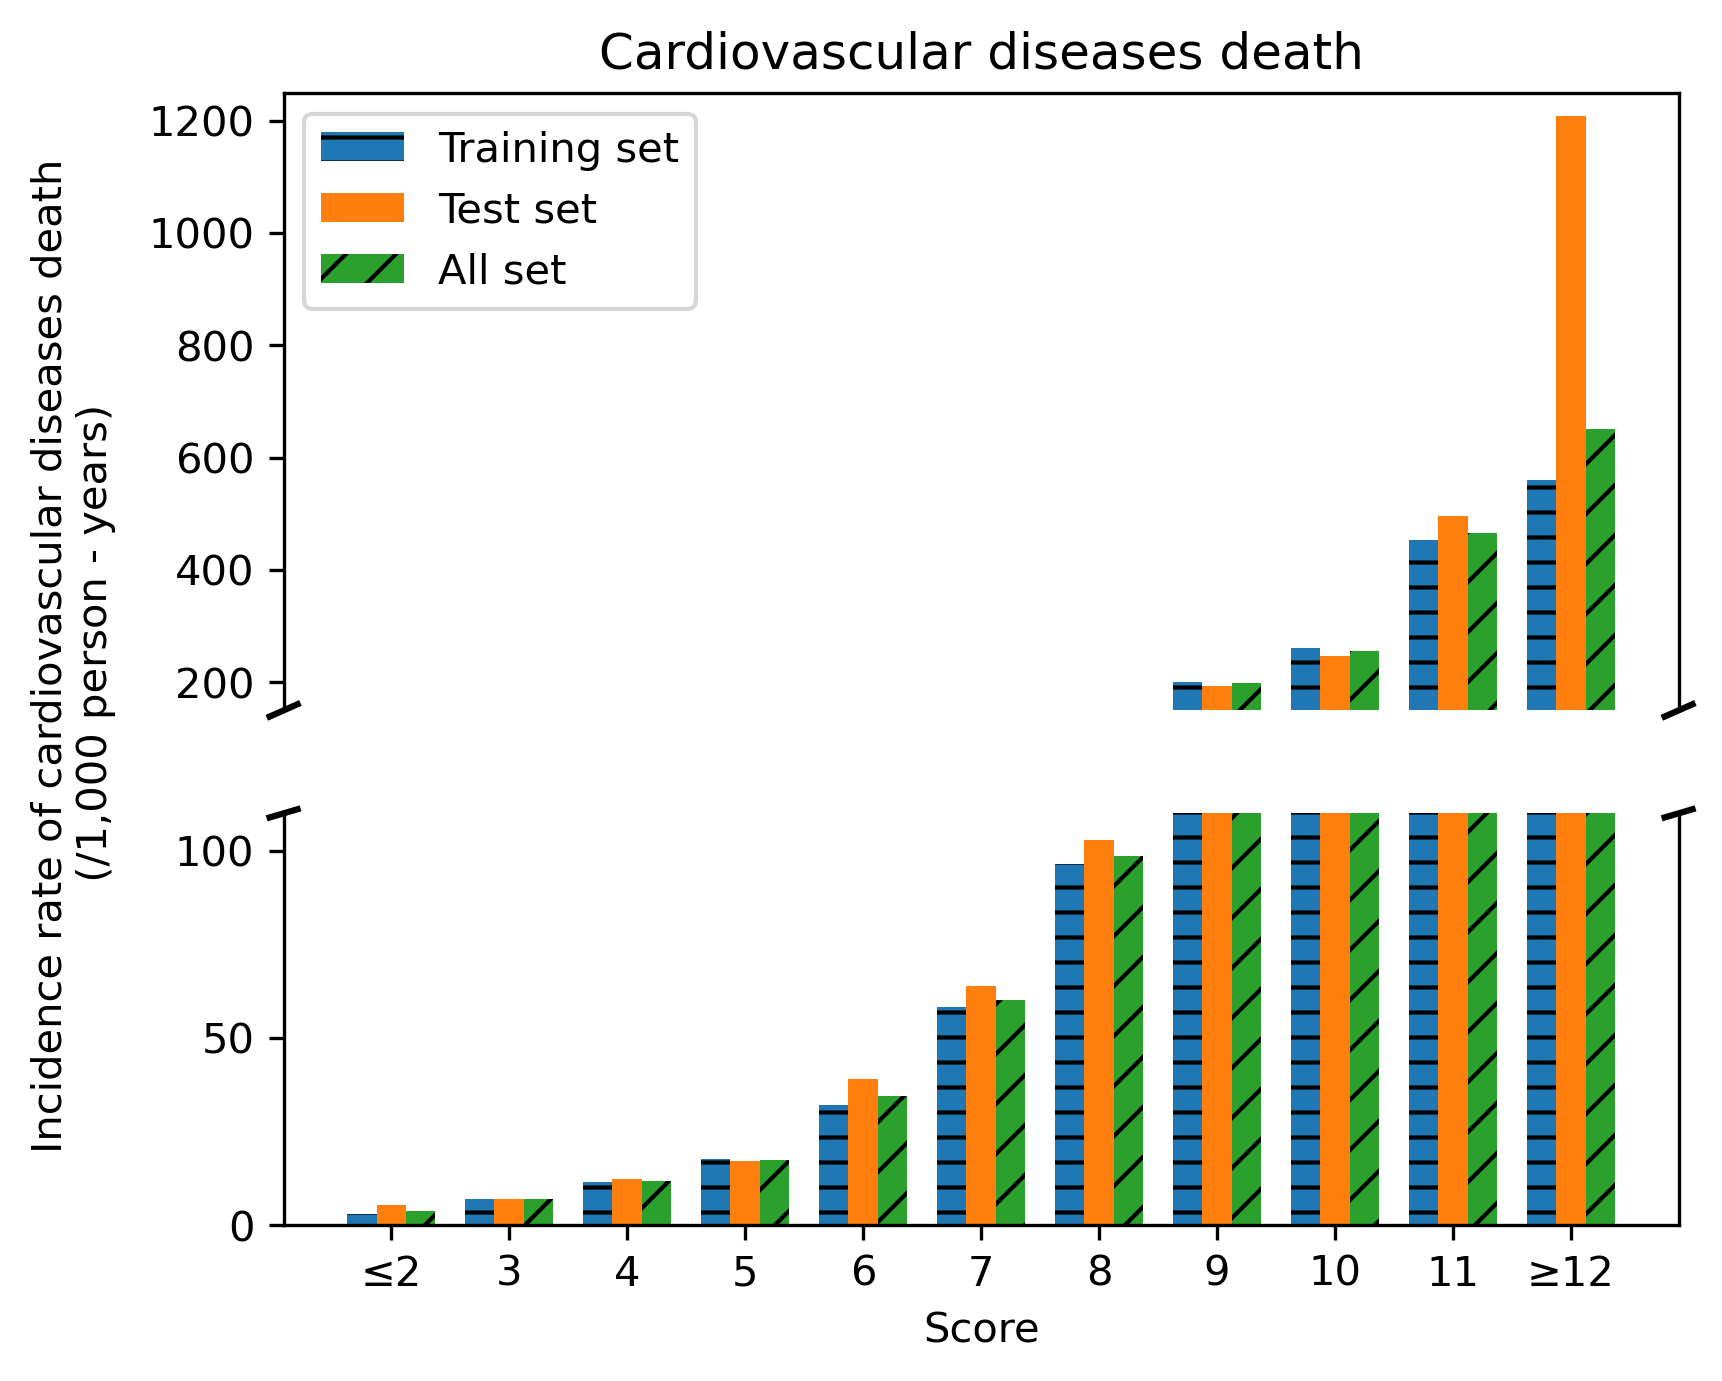

In [7]:
cvd_total_ticks = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
x = np.arange(len(cvd_total_ticks))

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, dpi=300, gridspec_kw={'height_ratios': [3, 2]}, figsize=(6, 5))

# plot the same data on both axes
rects1 = ax.bar(x - 0.25, cvd_total.iloc[0, :], 0.25, label='Training set', hatch = "--")
rects2 = ax.bar(x + 0.00, cvd_total.iloc[1, :], 0.25, label='Test set', hatch = "")
rects3 = ax.bar(x + 0.25, cvd_total.iloc[2, :], 0.25, label='All set', hatch = "//")

rects1 = ax2.bar(x - 0.25, cvd_total.iloc[0, :], 0.25, label='Training set', hatch = "--")
rects2 = ax2.bar(x + 0.00, cvd_total.iloc[1, :], 0.25, label='Test set', hatch = "")
rects3 = ax2.bar(x + 0.25, cvd_total.iloc[2, :], 0.25, label='All set', hatch = "//")

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 110)  # outliers only
ax.set_ylim(150, 1250)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.axes.xaxis.set_visible(False)

d = 0.01
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_title("Cardiovascular diseases death")
ax2.set_xlabel("Score")
ax2.set_ylabel("Incidence rate of cardiovascular diseases death \n (/1,000 person - years)")
ax2.set_xticks(x)
ax2.set_xticklabels(cvd_total_ticks)
ax2.yaxis.set_label_coords(-0.12,1.4)

ax.legend()
#plt.savefig("Incidence rate of cardiovascular diseases.png", dpi = 300, transparent = False, bbox_inches='tight')
plt.show()

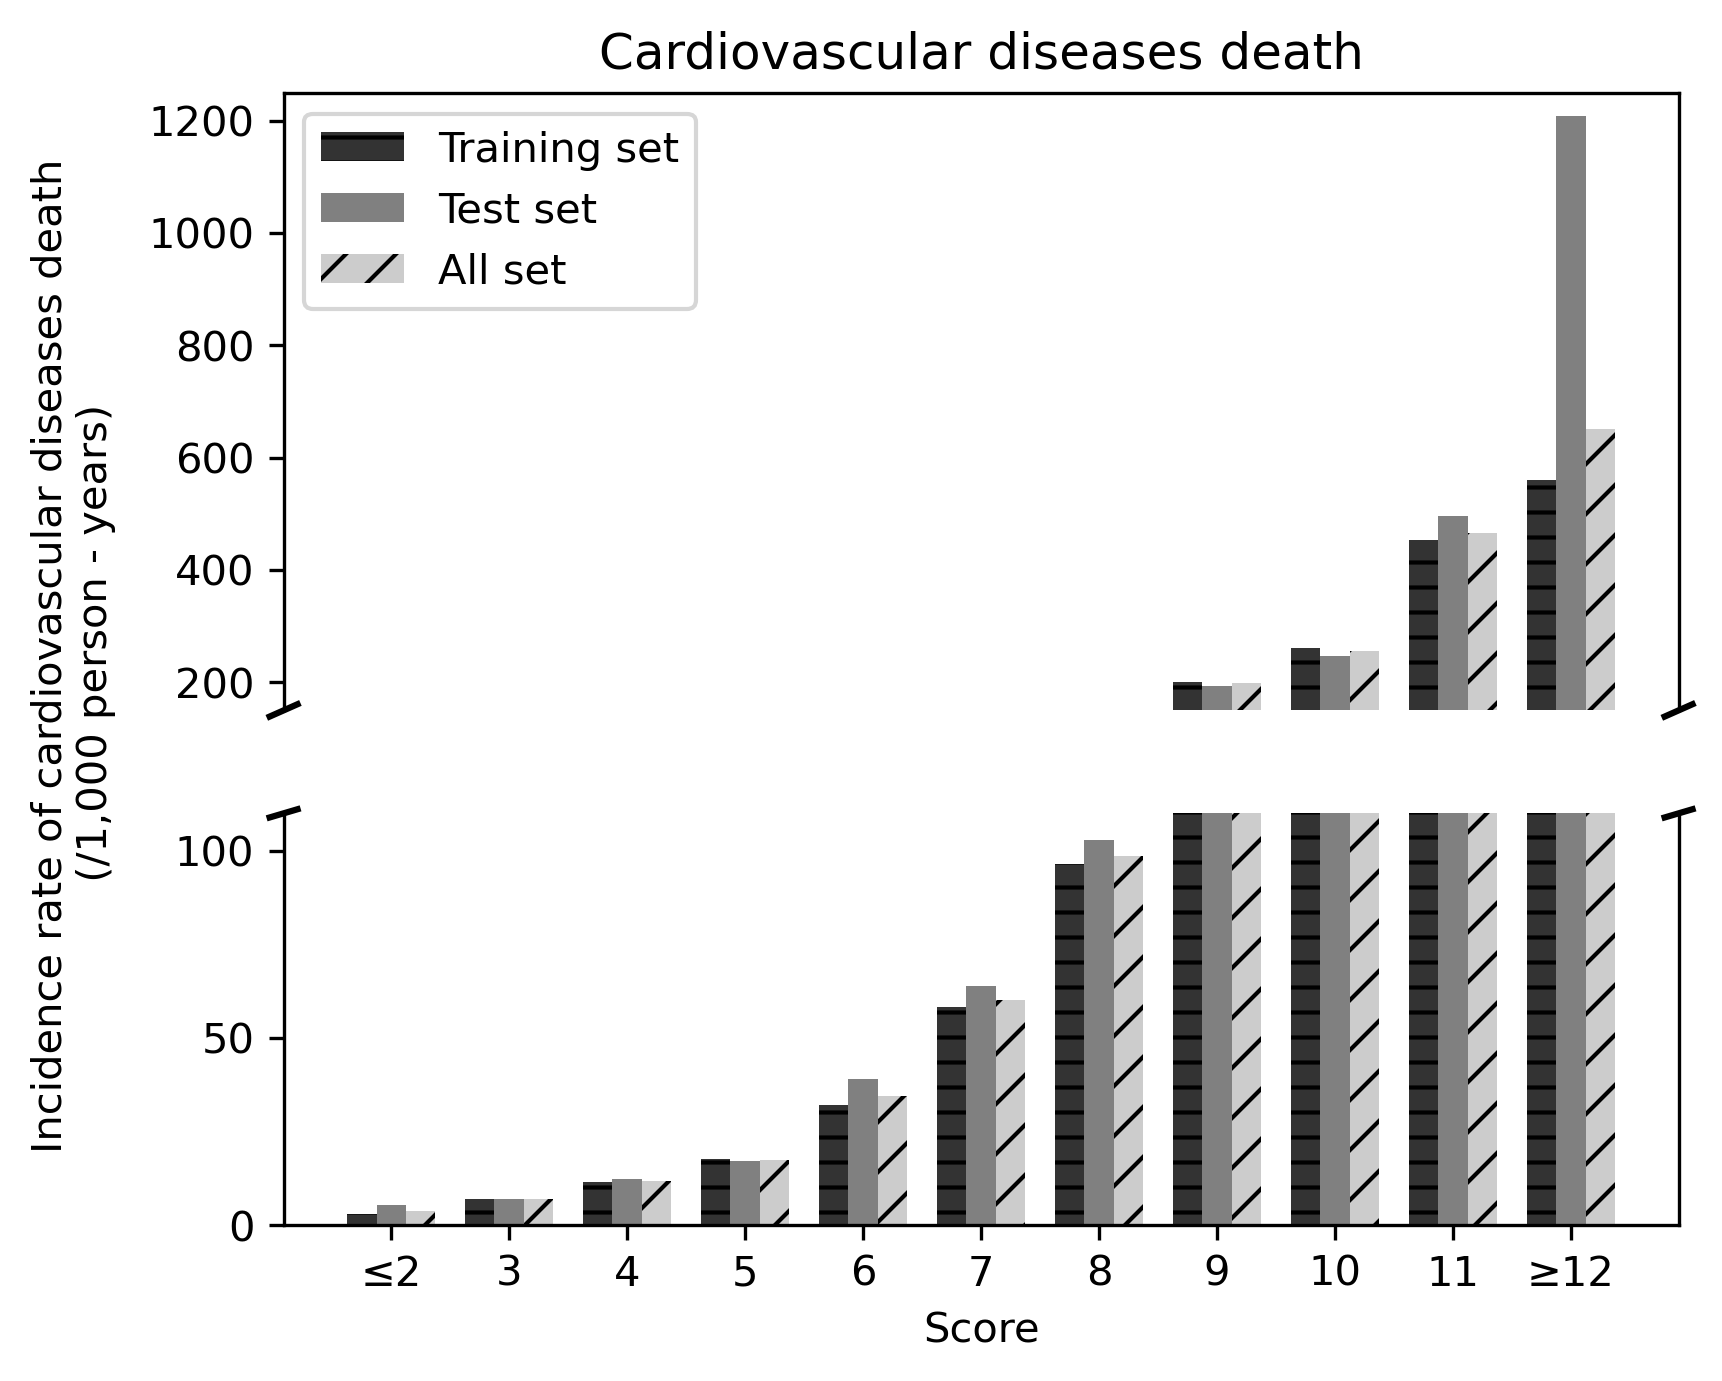

In [8]:
cvd_total_ticks = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
x = np.arange(len(cvd_total_ticks))

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, dpi=300, gridspec_kw={'height_ratios': [3, 2]}, figsize=(6, 5))

# plot the same data on both axes
rects1 = ax.bar(x - 0.25, cvd_total.iloc[0, :], 0.25, label='Training set', hatch = "--", color="0.2")
rects2 = ax.bar(x + 0.00, cvd_total.iloc[1, :], 0.25, label='Test set', hatch = "", color="0.5")
rects3 = ax.bar(x + 0.25, cvd_total.iloc[2, :], 0.25, label='All set', hatch = "//", color="0.8")

rects1 = ax2.bar(x - 0.25, cvd_total.iloc[0, :], 0.25, label='Training set', hatch = "--", color="0.2")
rects2 = ax2.bar(x + 0.00, cvd_total.iloc[1, :], 0.25, label='Test set', hatch = "", color="0.5")
rects3 = ax2.bar(x + 0.25, cvd_total.iloc[2, :], 0.25, label='All set', hatch = "//", color="0.8")

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 110)  # outliers only
ax.set_ylim(150, 1250)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.axes.xaxis.set_visible(False)

d = 0.01
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_title("Cardiovascular diseases death")
ax2.set_xlabel("Score")
ax2.set_ylabel("Incidence rate of cardiovascular diseases death \n (/1,000 person - years)")
ax2.set_xticks(x)
ax2.set_xticklabels(cvd_total_ticks)
ax2.yaxis.set_label_coords(-0.12,1.4)

ax.legend()
#plt.savefig("Incidence rate of cardiovascular diseases_scaled.png", dpi = 300, transparent = False, bbox_inches='tight')
plt.show()

In [9]:
mort = pd.read_csv("(v4)Cox_Patient_Score_Mort.csv")[["LOC", "SurvivalDays", "Mortality", "Mort_Score_Top5"]]
mort["Mort_Score_Top5"][mort["Mort_Score_Top5"] <= 2] = "≤2"
mort["Mort_Score_Top5"][mort["Mort_Score_Top5"].isin([12,13])] = "≥12"

mort_training = mort[mort["LOC"].isin(["2", "3", "6"])]
mort_test = mort[mort["LOC"].isin(["8"])]
mort_all = mort[mort["LOC"].isin(["2", "3", "6", "8"])]

In [10]:
mort_training_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    mort_training_subgroup = mort_training[mort_training["Mort_Score_Top5"] == i]
    mort_training_subgroup["SurvivalYears"] = mort_training_subgroup["SurvivalDays"] / 365
    mort_training_subgroup_ppl_year = sum(mort_training_subgroup["Mortality"]) / (mort_training_subgroup["SurvivalYears"].mean() * len(mort_training_subgroup)) * 1000
    mort_training_subgroup_list.append(mort_training_subgroup_ppl_year)

In [11]:
mort_test_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    mort_test_subgroup = mort_test[mort_test["Mort_Score_Top5"] == i]
    mort_test_subgroup["SurvivalYears"] = mort_test_subgroup["SurvivalDays"] / 365
    mort_test_subgroup_ppl_year = sum(mort_test_subgroup["Mortality"]) / (mort_test_subgroup["SurvivalYears"].mean() * len(mort_test_subgroup)) * 1000
    mort_test_subgroup_list.append(mort_test_subgroup_ppl_year)

In [12]:
mort_all_subgroup_list = []
for i in ["≤2", 3, 4, 5, 6, 7, 8, 9, 10, 11, "≥12"]:
    mort_all_subgroup = mort_all[mort_all["Mort_Score_Top5"] == i]
    mort_all_subgroup["SurvivalYears"] = mort_all_subgroup["SurvivalDays"] / 365
    mort_all_subgroup_ppl_year = sum(mort_all_subgroup["Mortality"]) / (mort_all_subgroup["SurvivalYears"].mean() * len(mort_all_subgroup)) * 1000
    mort_all_subgroup_list.append(mort_all_subgroup_ppl_year)

In [13]:
mort_total = pd.DataFrame([mort_training_subgroup_list, mort_test_subgroup_list, mort_all_subgroup_list])
mort_total.columns = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
mort_total

,≤2,3,4,5,6,7,8,9,10,11,≥12
0,9.399049,16.300801,31.359689,49.186905,88.639891,144.977437,242.851774,383.667197,630.350681,920.863809,1770.371397
1,14.463956,17.004815,31.096258,47.489627,99.696460,160.626672,282.652912,391.475157,777.586485,782.910161,1035.093938
2,10.711912,16.506906,31.280393,48.630889,92.380631,150.635753,255.669922,386.452009,676.647220,877.140282,1447.736818


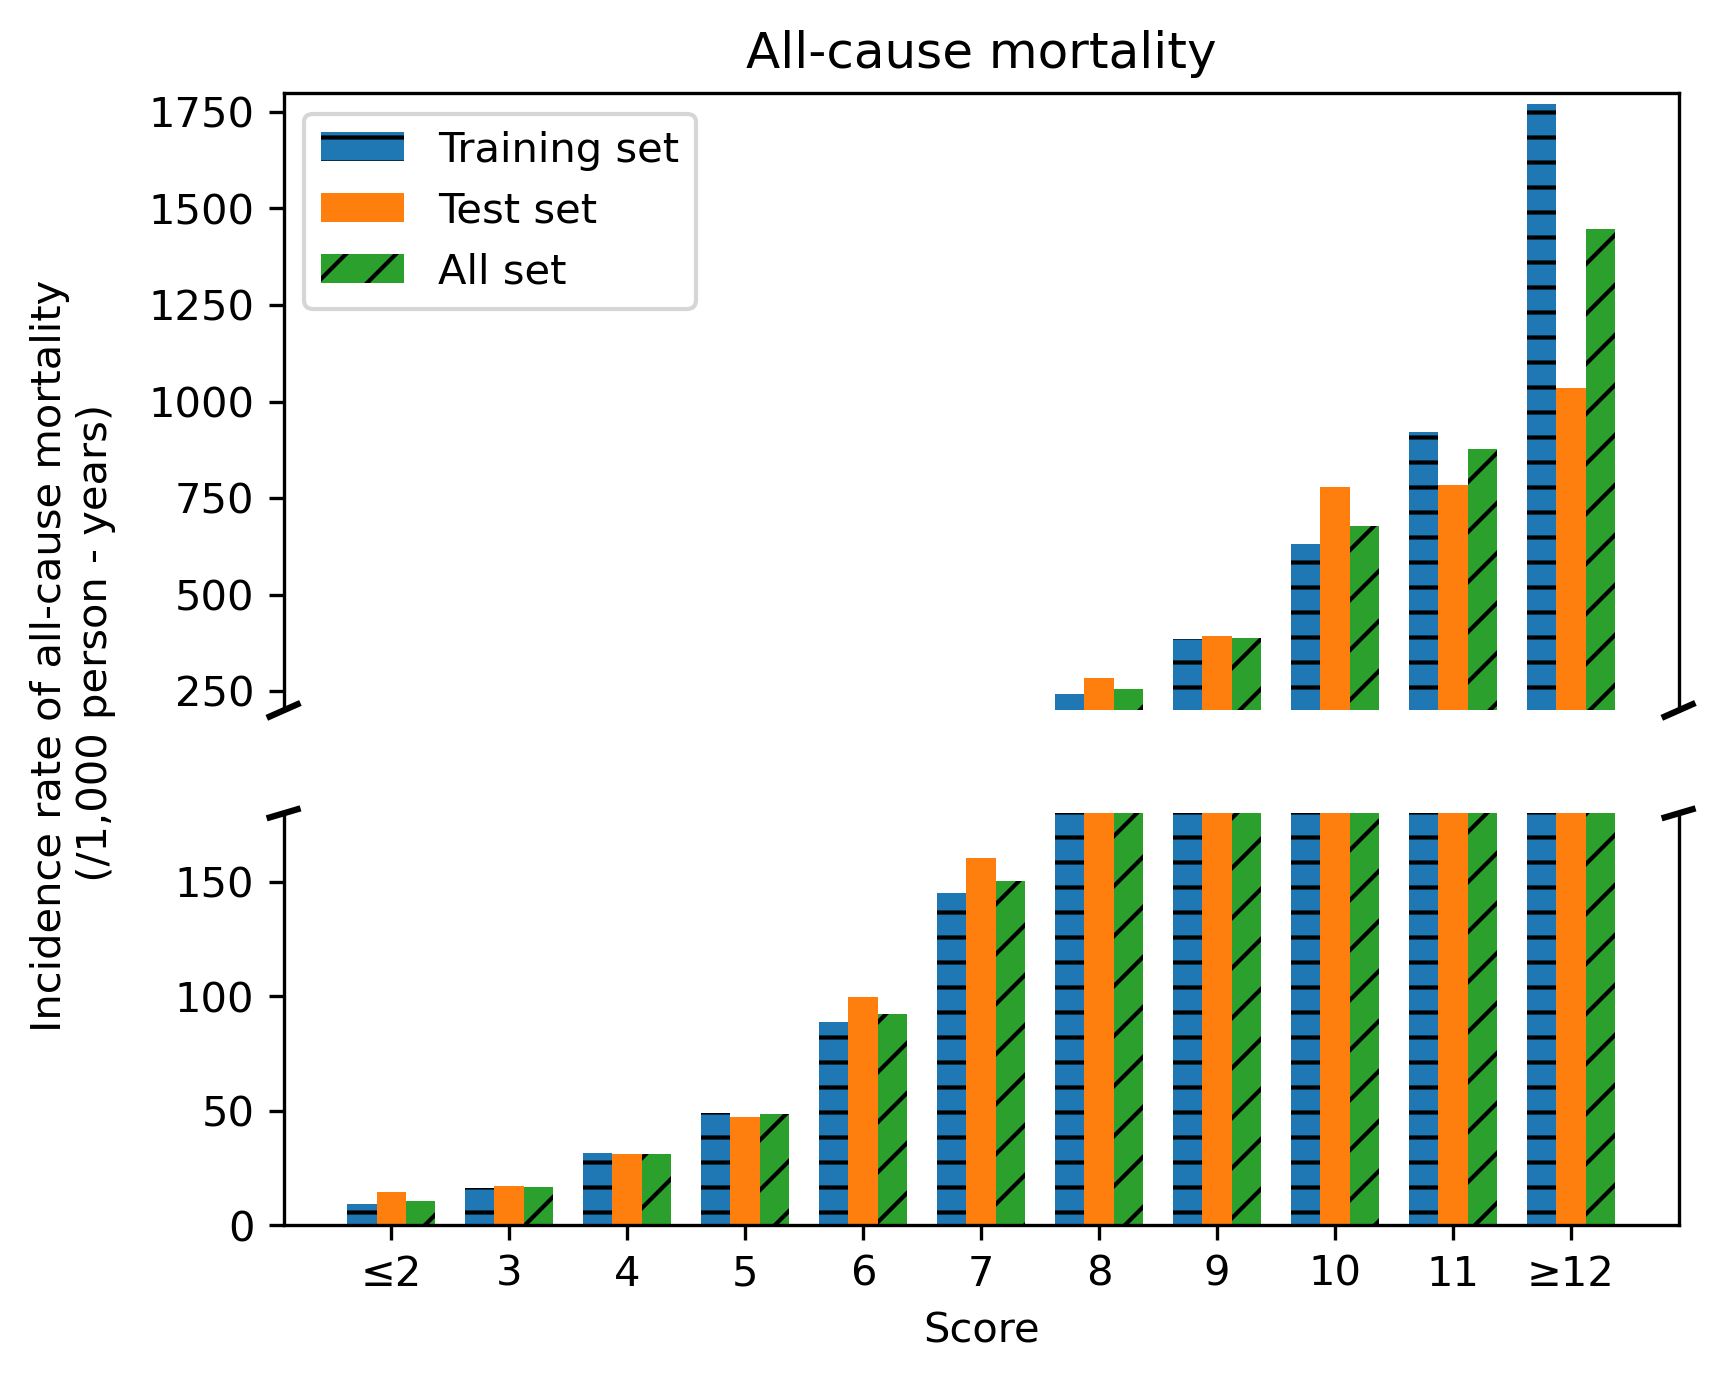

In [14]:
mort_total_ticks = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
x = np.arange(len(mort_total_ticks))

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, dpi=300, gridspec_kw={'height_ratios': [3, 2]}, figsize=(6, 5))

# plot the same data on both axes
rects1 = ax.bar(x - 0.25, mort_total.iloc[0, :], 0.25, label='Training set', hatch = "--")
rects2 = ax.bar(x + 0.00, mort_total.iloc[1, :], 0.25, label='Test set', hatch = "")
rects3 = ax.bar(x + 0.25, mort_total.iloc[2, :], 0.25, label='All set', hatch = "//")

rects1 = ax2.bar(x - 0.25, mort_total.iloc[0, :], 0.25, label='Training set', hatch = "--")
rects2 = ax2.bar(x + 0.00, mort_total.iloc[1, :], 0.25, label='Test set', hatch = "")
rects3 = ax2.bar(x + 0.25, mort_total.iloc[2, :], 0.25, label='All set', hatch = "//")

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 180)  # outliers only
ax.set_ylim(200, 1800)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.axes.xaxis.set_visible(False)

d = 0.01
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_title("All-cause mortality")
ax2.set_xlabel("Score")
ax2.set_ylabel("Incidence rate of all-cause mortality \n (/1,000 person - years)")
ax2.set_xticks(x)
ax2.set_xticklabels(cvd_total_ticks)
ax2.yaxis.set_label_coords(-0.12,1.4)

ax.legend()
#plt.savefig("Incidence rate of mortality.png", dpi = 300, transparent = False, bbox_inches='tight')
plt.show()

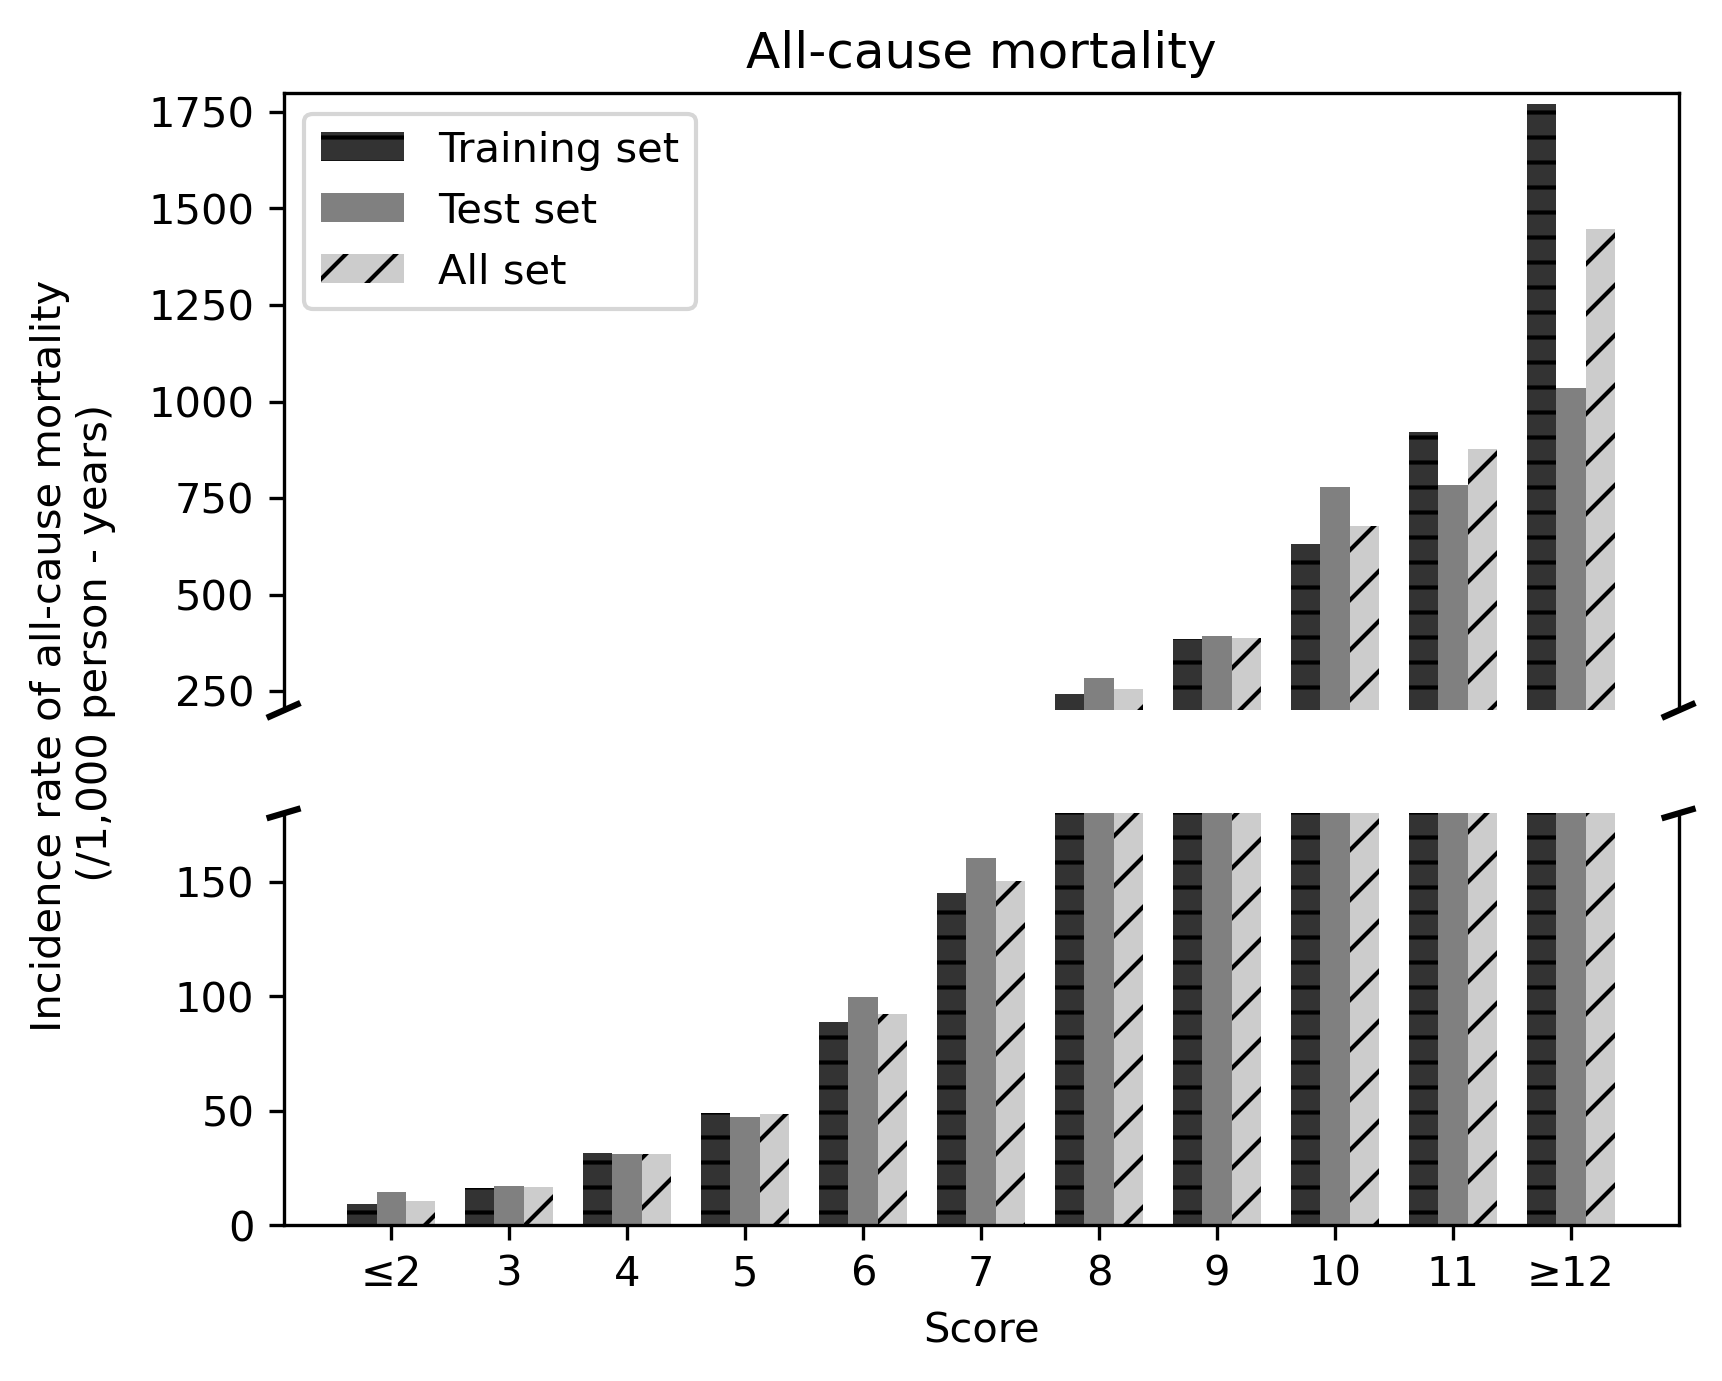

In [15]:
mort_total_ticks = ["≤2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "≥12"]
x = np.arange(len(mort_total_ticks))

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, dpi=300, gridspec_kw={'height_ratios': [3, 2]}, figsize=(6, 5))

# plot the same data on both axes
rects1 = ax.bar(x - 0.25, mort_total.iloc[0, :], 0.25, label='Training set', hatch = "--", color="0.2")
rects2 = ax.bar(x + 0.00, mort_total.iloc[1, :], 0.25, label='Test set', hatch = "", color="0.5")
rects3 = ax.bar(x + 0.25, mort_total.iloc[2, :], 0.25, label='All set', hatch = "//", color="0.8")

rects1 = ax2.bar(x - 0.25, mort_total.iloc[0, :], 0.25, label='Training set', hatch = "--", color="0.2")
rects2 = ax2.bar(x + 0.00, mort_total.iloc[1, :], 0.25, label='Test set', hatch = "", color="0.5")
rects3 = ax2.bar(x + 0.25, mort_total.iloc[2, :], 0.25, label='All set', hatch = "//", color="0.8")

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0, 180)  # outliers only
ax.set_ylim(200, 1800)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.axes.xaxis.set_visible(False)

d = 0.01
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_title("All-cause mortality")
ax2.set_xlabel("Score")
ax2.set_ylabel("Incidence rate of all-cause mortality \n (/1,000 person - years)")
ax2.set_xticks(x)
ax2.set_xticklabels(cvd_total_ticks)
ax2.yaxis.set_label_coords(-0.12,1.4)

ax.legend()
#plt.savefig("Incidence rate of mortality_scaled.png", dpi = 300, transparent = False, bbox_inches='tight')
plt.show()